## Natural Language Processing"
 It is a technology which is to make computers understand the human language.


 ### Example:

1.   Chatbots
2.   Audio to text
3.   Text to Audio
4.   Language Translation
5.   Suggesting words while searching






There two important key Concepts in NLP.

### Syntax:
Refers to the arrangment of words (Grammmar)

Techniques to deal with syntax,



1.   Lematization: Reducing different words into their root words.

2.   Morphological Segmentation:It involves dividing words into individual units called morphemes.

3.   Word Segmentation: It involves dividing a large piece of continuous text into distinct units.

4.   Parts of Speech Tagging: It involves identifying the part of speech for every word.

5.   Parsing: It involves undertaking grammatical analysis for the provided sentence.
6.   Sentence breaking: It involves placing sentence boundaries on a large piece of text.










### Sematics:
Refer to the context and meaning of the word.

Techniques:

1. Named entity recognition (NER): It involves determining the parts of a text that can be identified and categorized into preset groups. Examples of such groups include names of people and names of places.

2.  Word sense disambiguation: It involves giving meaning to a word based on the context.

3.  Natural language generation: It involves using databases to derive semantic intentions and convert them into human language.

# Lets jump to Coding 

### Downloan Dataset

We are using Tweets dataset about  natural disasters and will try to classify them using deep learning.

Link: https://www.kaggle.com/c/nlp-getting-started/data

### Visualize Dataset

In [2]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

1 = a real disaster Tweet

0 = not a real disaster Tweet

Check dtypes of column and the shape of the dataframe by info

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


Visualize Some random examples from data

In [8]:
import random

idx = random.randint(0,len(train_df)-5)

for row in train_df[['text','target']][idx:idx+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
? This Weekend: Stockholm Sweden - Aug 8 at Copperfields http://t.co/6un7xC9Sve

---

Target: 1 (real disaster)
Text:
The date for the release of EP03 DESOLATION is set. Stay tuned for more info while we finalise the schedule. #alt #electro #rock #comingsoon

---

Target: 0 (not real disaster)
Text:
Photoset: littlebitofbass: silinski: Ed Sheeran onåÊ'The Hobbit: The Desolation of Smaug' German premiere... http://t.co/iOsthxLcyv

---

Target: 0 (not real disaster)
Text:
The Hobbit Desolation of Smaug Thranduil 4' scale action figure loose Mirkwood - Full readÛ_ http://t.co/nYeL2BUAro http://t.co/2zGIUpn06T

---

Target: 1 (real disaster)
Text:
Just came back from camping and returned with a new song which gets recorded tomorrow. Can't wait! #Desolation #TheConspiracyTheory #NewEP

---



### Split data into training and validation set

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_df['text'], train_df['target'], test_size=0.1, shuffle=True, random_state=42)

In [10]:
X_train.shape, X_val.shape

((6851,), (762,))

### Converting Text into numbers

Ok computer don't process words it process numbers.
There a re various from which we can convert text into Numbers.

*  Text Vectorization: 

A straight mapping from word or character or sub-word to a numerical value. 


1. Using word-level tokenization with the sentence "I love 
TensorFlow" might result in "I" being 0, "love" being 1 and "TensorFlow" being 2. In this case, every word in a sequence considered a single token.

2. Character-level tokenization, such as converting the letters A-Z to values 1-26. In this case, every character in a sequence considered a single token.


3. Sub-word tokenization is in between word-level and character-level tokenization. It involves breaking invidual words into smaller parts and then converting those smaller parts into numbers. For example, "my favourite food is pineapple pizza" might become "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". After doing this, these sub-words would then be mapped to a numerical value. In this case, every word could be considered multiple tokens.



### Embedding

A fixed length of feature vector which represents the data.
Word 'love' could be represented as [0.3,0.1,0,77]. 


We will use TextVectorization from keras.

* max_tokens - The maximum number of words in your vocabulary (e.g. 20000 or the number of unique words in your text), includes a value for OOV (out of vocabulary) tokens.

* standardize - Method for standardizing text. Default is "lower_and_strip_punctuation" which lowers text and removes all punctuation marks.

* split - How to split text, default is "whitespace" which splits on spaces.

* ngrams - How many words to contain per token split, for example, ngrams=2 splits tokens into continuous sequences of 2.

* output_mode - How to output tokens, can be "int" (integer mapping), "binary" (one-hot encoding), "count" or "tf-idf". See documentation for more.

* output_sequence_length - Length of tokenized sequence to output. For example, if output_sequence_length=150, all tokenized sequences will be 150 tokens long.

* pad_to_max_tokens - Defaults to False, if True, the output feature axis will be padded to max_tokens even if the number of unique tokens in the vocabulary is less than max_tokens. 

Only valid in certain modes, see docs for more.

In [11]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)


text_vectorizer = TextVectorization(
    max_tokens=max_vocab_length, 
    standardize='lower_and_strip_punctuation', # text processing 
    split = 'whitespace',
    ngrams = None, # Make tokens of each word
    output_mode = 'int',
    output_sequence_length = max_length
)

In [12]:
# Fit the vectorizer

text_vectorizer.adapt(X_train)

In [13]:
sentence = 'Hello, this is Mike here.'
text_vectorizer([sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1399,   19,    9, 2863,  127,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [14]:
# Take random sample from training set and check its encoding

random_sentence = random.choice(X_train)

print(f'Orignal Sentence: {random_sentence},  \n\n Its vector \n')
text_vectorizer([random_sentence])

Orignal Sentence: Watch These Super Strong Magnets Destroy Everyday Objects: http://t.co/bTUs5jejuy http://t.co/zrTfxLuk6R,  

 Its vector 



<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 124,  243, 1046, 1243,    1,  395, 2125, 4970,    1,    1,    0,
           0,    0,    0,    0]])>

Now lets look into the vocabulary learnt by the vectorizer.

In [15]:
vocab = text_vectorizer.get_vocabulary()
print(f'Lenght of Vocab: {len(vocab)}')

Lenght of Vocab: 10000


In [16]:
vocab[:10]


['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

#### Now lets create an Embedding 

Parameters:

* input_dim - The size of the vocabulary (e.g. len(text_vectorizer.get_vocabulary()).

* output_dim - The size of the output embedding vector, for example, a value of 100 outputs a feature vector of size 100 for each word.

* embeddings_initializer - How to initialize the embeddings matrix, default is "uniform" which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.

* input_length - Length of sequences being passed to embedding layer.

In [17]:
from tensorflow.keras.layers import Embedding

embedding = Embedding(
    input_dim = max_vocab_length,
    output_dim=128,
    embeddings_initializer = 'uniform',
    input_length = max_length,
    )

embedding


In [19]:
# Get a random sentence from training set
random_sentence = random.choice(X_train)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Caution: breathing may be hazardous to your health.      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.02368047,  0.02212152,  0.01695193, ...,  0.0038694 ,
          0.0137109 , -0.01221311],
        [ 0.01559604, -0.03038614,  0.03176484, ..., -0.01332124,
          0.01221111, -0.04033256],
        [ 0.04174248,  0.02299744,  0.01197843, ..., -0.04220469,
         -0.04006288, -0.01101909],
        ...,
        [-0.01924898, -0.03275981,  0.00189238, ...,  0.032512  ,
          0.04362888,  0.04986384],
        [-0.01924898, -0.03275981,  0.00189238, ...,  0.032512  ,
          0.04362888,  0.04986384],
        [-0.01924898, -0.03275981,  0.00189238, ...,  0.032512  ,
          0.04362888,  0.04986384]]], dtype=float32)>

In [20]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.02368047,  0.02212152,  0.01695193, -0.01324014, -0.03806487,
       -0.03944569, -0.02551633,  0.00624527, -0.01454023,  0.00041839,
        0.04449448, -0.04635767,  0.01731772, -0.03178601, -0.04802544,
        0.04737038, -0.04458218,  0.02657696,  0.01423254,  0.01847664,
       -0.01917009,  0.01377728, -0.03261261, -0.03468885,  0.00809089,
        0.0384428 ,  0.01744989,  0.00078041,  0.0173972 , -0.02570126,
       -0.00190668,  0.0300581 , -0.03633239, -0.02949131,  0.00884156,
       -0.0227263 ,  0.03756073,  0.0495033 ,  0.01726557,  0.00320145,
        0.01646492,  0.02031453, -0.0437487 , -0.03619857,  0.03974657,
       -0.04261002, -0.01583468, -0.00721173, -0.03823781, -0.00605717,
       -0.03340901,  0.00979136,  0.00998411,  0.02398831,  0.04471369,
       -0.01814926, -0.0323303 ,  0.04686016, -0.01792815,  0.04395572,
        0.02262134,  0.04638979, -0.04395979,  0.02746535, -0.02651253,
       -0.021518

# Model Building:

We are going to build different types of models on the text data.

### TF-IDF

Term Frequency Inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

So basically we convert our words to feature vectors which we'll use to build our model.

Documentation:https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [22]:
# accuracy

model_0.score(X_val, y_val)

0.7782152230971129

Accuracy is pretty good on test set.

Let's build a helping function metrics calculation.

In [23]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model(y_train,y_pred_train,y_val,y_pred_val):
  

  print('Train accuracy: ',accuracy_score(y_train,y_pred_train))
  print('--------------------------------------------------\n')

  print('Validation accuracy: ',accuracy_score(y_val, y_pred_val))
  print('--------------------------------------------------\n')

  print(classification_report(y_val, y_pred_val))



In [24]:
import matplotlib.pyplot as plt
# Plot the validation and training data separately
def plot_graphs(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [25]:
y_pred_train = model_0.predict(X_train)
y_pred_val = model_0.predict(X_val)

evaluate_model(y_train,y_pred_train,y_val,y_pred_val)

Train accuracy:  0.8906728944679608
--------------------------------------------------

Validation accuracy:  0.7782152230971129
--------------------------------------------------

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       426
           1       0.86      0.60      0.70       336

    accuracy                           0.78       762
   macro avg       0.80      0.76      0.76       762
weighted avg       0.79      0.78      0.77       762



In [26]:
from tensorflow.keras import layers


inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding
x = layers.Dense(10,activation='relu')(x)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [27]:
# Compile the Model

model_1.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])

In [28]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 1)               

In [29]:
hist_1 = model_1.fit(X_train, y_train, epochs=10, validation_data=(X_val,y_val))

Epoch 1/10
215/215 [==============================] - 5s 5ms/step - loss: 0.5863 - accuracy: 0.7095 - val_loss: 0.5049 - val_accuracy: 0.7966
Epoch 2/10
215/215 [==============================] - 1s 4ms/step - loss: 0.3683 - accuracy: 0.8501 - val_loss: 0.4835 - val_accuracy: 0.7927
Epoch 3/10
215/215 [==============================] - 1s 4ms/step - loss: 0.2568 - accuracy: 0.9010 - val_loss: 0.5319 - val_accuracy: 0.7730
Epoch 4/10
215/215 [==============================] - 1s 4ms/step - loss: 0.1873 - accuracy: 0.9307 - val_loss: 0.6050 - val_accuracy: 0.7625
Epoch 5/10
215/215 [==============================] - 1s 4ms/step - loss: 0.1441 - accuracy: 0.9473 - val_loss: 0.6673 - val_accuracy: 0.7546
Epoch 6/10
215/215 [==============================] - 1s 4ms/step - loss: 0.1161 - accuracy: 0.9609 - val_loss: 0.7422 - val_accuracy: 0.7598
Epoch 7/10
215/215 [==============================] - 1s 5ms/step - loss: 0.0965 - accuracy: 0.9660 - val_loss: 0.8063 - val_accuracy: 0.7507
Epoch 

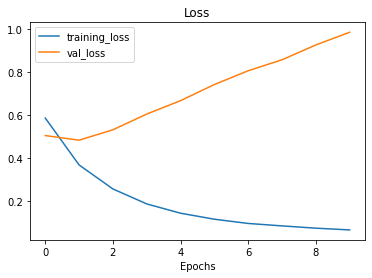

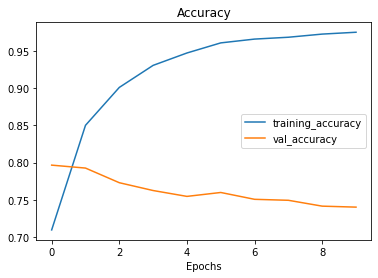

In [30]:
plot_graphs(hist_1)

Accuracy seems ok so could we make the hypothesis that our model is good? Nope you have to analyze both the graphs Loss and Accuracy. You can see that accuracy of our model is good but the losses are not, Both Validation and Traning loss have very high difference so what we could conclude from this?

Actually our model is overfitting on training data, In error analysis we have to look all the metrics that are necessary from which we could judge the model performance.



In [31]:
model_1_y_pred = model_1.predict(X_val)

In [32]:
model_1_y_pred[:10]

array([[9.82525991e-04],
       [3.64195034e-02],
       [1.68646127e-02],
       [3.40391824e-04],
       [8.87781680e-01],
       [1.18760355e-01],
       [6.30824297e-06],
       [3.20012033e-01],
       [3.83967049e-02],
       [9.98449326e-01]], dtype=float32)

In [33]:
model_1_pred = tf.squeeze(tf.round(model_1_y_pred))

In [34]:
model_1_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1.], dtype=float32)>

In [35]:
# Evaluate Model

y_pred_train = tf.squeeze(tf.round(model_1.predict(X_train)))
y_pred_val = tf.squeeze(tf.round(model_1.predict(X_val)))

evaluate_model(y_train,y_pred_train,y_val,y_pred_val)

Train accuracy:  0.9795650270033571
--------------------------------------------------

Validation accuracy:  0.7401574803149606
--------------------------------------------------

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       426
           1       0.71      0.70      0.70       336

    accuracy                           0.74       762
   macro avg       0.74      0.74      0.74       762
weighted avg       0.74      0.74      0.74       762



In [36]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [37]:
# Get the weight matrix of embedding layer 
# (these are the numerical patterns between the text in the training dataset the model has learned)

embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape) # same size as vocab size and embedding_dim (each word is a embedding_dim size vector)

(10000, 128)


In [38]:
embed_weights[0]

array([-4.78967139e-03, -2.08142959e-02, -3.30095142e-02, -6.08784333e-02,
       -7.98664093e-02, -7.52688050e-02,  1.76426828e-01,  8.68976638e-02,
       -5.09819351e-02,  1.08508356e-02, -6.37013791e-03,  2.46281195e-02,
        5.30128367e-02, -4.64517176e-02,  1.89938247e-02, -4.69011515e-02,
       -5.39387576e-02, -1.38751529e-02,  2.56403033e-02,  1.30673572e-02,
       -7.13746995e-03, -5.17504588e-02, -2.02710070e-02,  1.74242246e-04,
       -5.27221262e-02, -7.94508867e-03, -1.60773769e-01,  1.71489473e-02,
        3.23940367e-02,  6.77889679e-03,  1.88816804e-03,  9.24954098e-03,
        1.47494432e-02,  5.25141619e-02,  1.66133400e-02, -1.91623140e-02,
        8.62878934e-03, -1.97028276e-03, -7.31159523e-02, -7.47035891e-02,
        5.88158099e-03, -7.71418065e-02,  1.90838706e-02, -6.27403939e-03,
        1.99087313e-03,  1.94610059e-02,  6.83535764e-04,  4.81014065e-02,
       -4.89533730e-02,  5.35230478e-03, -8.33480358e-02,  1.86461180e-01,
       -1.48782097e-02,  

We can visualize these Embeddings through a Embedding Vector Tool of TensorFlow. First create files for Embedding using the code given below.

In [39]:
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0: 
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

After Creating and download the files follow these steps:


1. Go to http://projector.tensorflow.org/

2. Click on "Load data"

3. Upload the two files you downloaded (embedding_vectors.tsv and embedding_metadata.tsv)

4. Explore
Optional: You can share the data you've created by clicking "Publish"

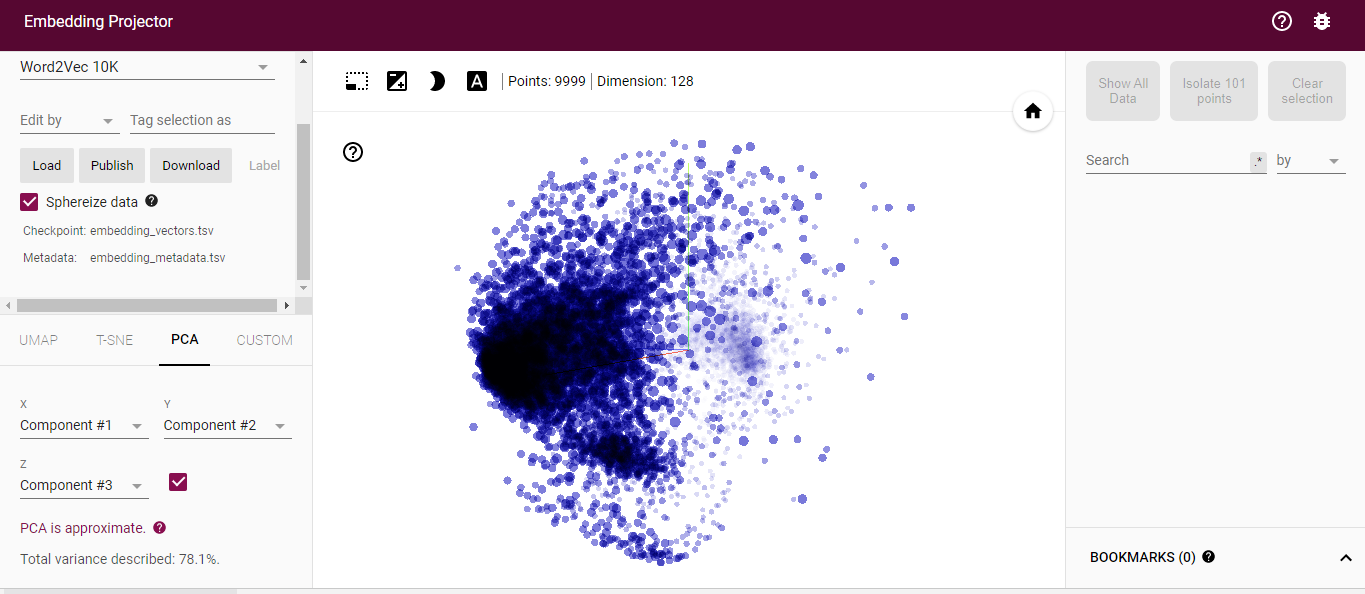

# RNN (Recurrent Neural Networks)

A recurrent neural network (RNN) is a special type of an artificial neural network adapted to work for time series data or data that involves sequences.

## Architecture:

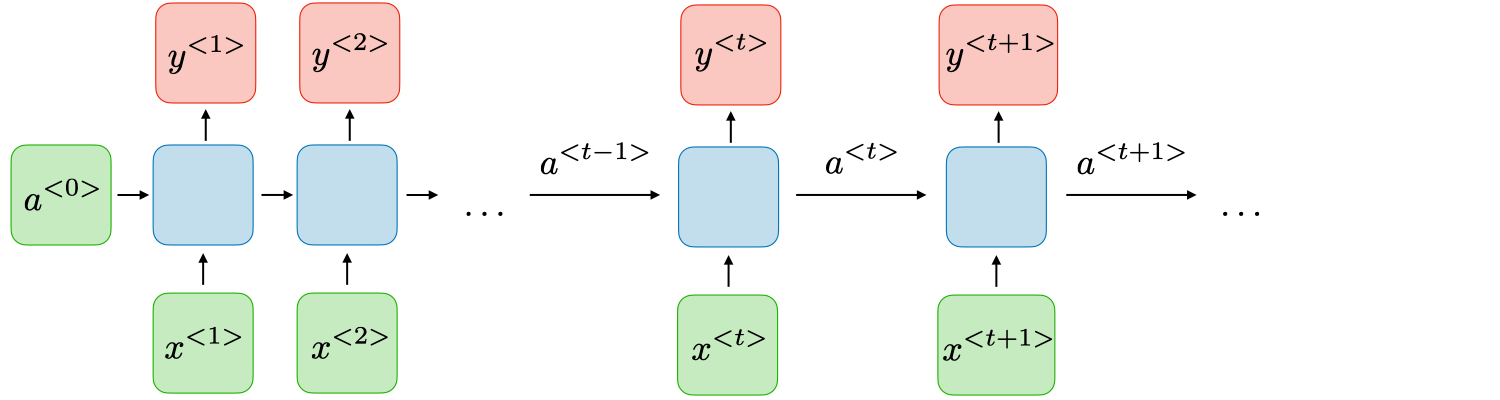

Types of Problems RNN addresses

1. One to one: one input, one output, such as image classification.

2. One to many: one input, many outputs, such as image captioning (image input, a sequence of text as caption output).

3. Many to one: many inputs, one outputs, such as text classification (classifying a Tweet as real diaster or not real diaster).

4. Many to many: many inputs, many outputs, such as machine translation (translating English to Spanish) or speech to text (audio wave as input, text as output).

### Flavours of RNN:

1. Long short-term memory cells (LSTMs).

2. Gated recurrent units (GRUs).

3. Bidirectional RNN's (passes forward and backward along a sequence, left to right and right to left).



> Resources:

1. https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks

2. [MIT Deep Learning RNN](https://www.youtube.com/watch?v=SEnXr6v2ifU)


## Model_2 LSTM

In [40]:
from tensorflow.keras import layers

embedding_2 = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")

# Create LSTM Model
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)

# embedding layer
x = embedding_2(x)
# LSTM layer
x= layers.LSTM(64)(x)

x= layers.Dense(32,activation='relu')(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs)


In [41]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [42]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                             

In [43]:
hist_2 =  model_2.fit(X_train,
                      y_train,
                      epochs=10,
                      validation_data=(X_val, y_val))

Epoch 1/10
215/215 [==============================] - 6s 8ms/step - loss: 0.5119 - accuracy: 0.7476 - val_loss: 0.4797 - val_accuracy: 0.7927
Epoch 2/10
215/215 [==============================] - 1s 6ms/step - loss: 0.3148 - accuracy: 0.8723 - val_loss: 0.5015 - val_accuracy: 0.7690
Epoch 3/10
215/215 [==============================] - 1s 6ms/step - loss: 0.2069 - accuracy: 0.9180 - val_loss: 0.6622 - val_accuracy: 0.7507
Epoch 4/10
215/215 [==============================] - 1s 7ms/step - loss: 0.1345 - accuracy: 0.9472 - val_loss: 0.8632 - val_accuracy: 0.7441
Epoch 5/10
215/215 [==============================] - 1s 7ms/step - loss: 0.1006 - accuracy: 0.9578 - val_loss: 0.7903 - val_accuracy: 0.7572
Epoch 6/10
215/215 [==============================] - 1s 7ms/step - loss: 0.0805 - accuracy: 0.9632 - val_loss: 1.2772 - val_accuracy: 0.7323
Epoch 7/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0688 - accuracy: 0.9692 - val_loss: 1.2135 - val_accuracy: 0.7441
Epoch 

In [44]:
# Evaluate Model

y_pred_train = tf.squeeze(tf.round(model_2.predict(X_train)))
y_pred_val = tf.squeeze(tf.round(model_2.predict(X_val)))

evaluate_model(y_train,y_pred_train,y_val,y_pred_val)

Train accuracy:  0.9814625602101883
--------------------------------------------------

Validation accuracy:  0.7572178477690289
--------------------------------------------------

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       426
           1       0.76      0.65      0.70       336

    accuracy                           0.76       762
   macro avg       0.76      0.75      0.75       762
weighted avg       0.76      0.76      0.75       762



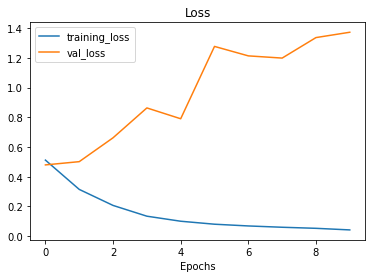

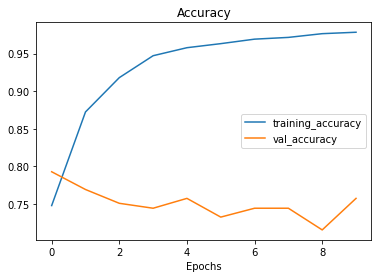

In [45]:
plot_graphs(hist_2)

## Model 3 (GRU)

A gated recurrent unit (GRU) is a gating mechanism in recurrent neural networks (RNN) similar to a long short-term memory (LSTM) unit but without an output gate. GRU’s try to solve the vanishing gradient problem that can come with standard recurrent neural networks. A GRU can be considered a variation of the long short-term memory (LSTM) unit because both have a similar design and produce equal results in some cases. 



> Resources:

https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be

https://www.analyticsvidhya.com/blog/2021/03/introduction-to-gated-recurrent-unit-gru/



Implementation

In [46]:
embedding_3 = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding_3(x)

x = layers.GRU(64)(x) 
x = layers.Dense(64, activation="relu")(x) 
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [47]:
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [48]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                       

In [49]:
hist_3 = model_3.fit(X_train,y_train, epochs=10, validation_data=(X_val,y_val))

Epoch 1/10
215/215 [==============================] - 4s 8ms/step - loss: 0.5268 - accuracy: 0.7287 - val_loss: 0.4642 - val_accuracy: 0.7900
Epoch 2/10
215/215 [==============================] - 1s 6ms/step - loss: 0.3172 - accuracy: 0.8694 - val_loss: 0.5032 - val_accuracy: 0.7835
Epoch 3/10
215/215 [==============================] - 1s 6ms/step - loss: 0.2179 - accuracy: 0.9172 - val_loss: 0.5551 - val_accuracy: 0.7664
Epoch 4/10
215/215 [==============================] - 1s 6ms/step - loss: 0.1519 - accuracy: 0.9426 - val_loss: 0.6681 - val_accuracy: 0.7690
Epoch 5/10
215/215 [==============================] - 1s 6ms/step - loss: 0.1111 - accuracy: 0.9616 - val_loss: 0.8636 - val_accuracy: 0.7533
Epoch 6/10
215/215 [==============================] - 1s 7ms/step - loss: 0.0805 - accuracy: 0.9707 - val_loss: 0.8997 - val_accuracy: 0.7730
Epoch 7/10
215/215 [==============================] - 2s 9ms/step - loss: 0.0647 - accuracy: 0.9737 - val_loss: 1.0916 - val_accuracy: 0.7585
Epoch 

In [50]:
# Evaluate Model

y_pred_train = tf.squeeze(tf.round(model_3.predict(X_train)))
y_pred_val = tf.squeeze(tf.round(model_3.predict(X_val)))

evaluate_model(y_train,y_pred_train,y_val,y_pred_val)

Train accuracy:  0.9807327397460225
--------------------------------------------------

Validation accuracy:  0.7598425196850394
--------------------------------------------------

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       426
           1       0.78      0.64      0.70       336

    accuracy                           0.76       762
   macro avg       0.76      0.75      0.75       762
weighted avg       0.76      0.76      0.76       762



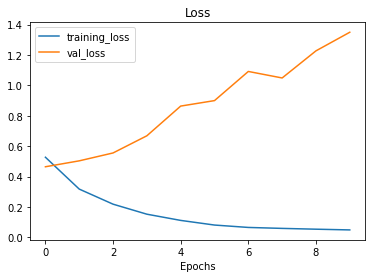

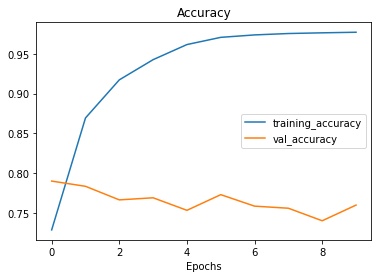

In [51]:
plot_graphs(hist_3)

## Model 4 (Bidirectional LSTM)



Bidirectional long-short term memory(bi-lstm) is the process of making any neural network o have the sequence information in both directions backwards (future to past) or forward(past to future). 

In bidirectional, our input flows in two directions, making a bi-lstm different from the regular LSTM. With the regular LSTM, we can make input flow in one direction, either backwards or forward. However, in bi-directional, we can make the input flow in both directions to preserve the future and the past information. For a better explanation, let’s have an example.    



Implementation:

In [52]:
embedding_4 = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding_4(x)
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
x = layers.Dense(64,activation='relu')(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [53]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [54]:
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)       

In [55]:
hist_4 = model_4.fit(X_train,y_train, epochs=10, validation_data=(X_val,y_val))

Epoch 1/10
215/215 [==============================] - 11s 23ms/step - loss: 0.5147 - accuracy: 0.7408 - val_loss: 0.4766 - val_accuracy: 0.7913
Epoch 2/10
215/215 [==============================] - 3s 14ms/step - loss: 0.3121 - accuracy: 0.8727 - val_loss: 0.4961 - val_accuracy: 0.7795
Epoch 3/10
215/215 [==============================] - 3s 14ms/step - loss: 0.2142 - accuracy: 0.9169 - val_loss: 0.5661 - val_accuracy: 0.7572
Epoch 4/10
215/215 [==============================] - 3s 14ms/step - loss: 0.1409 - accuracy: 0.9460 - val_loss: 0.7276 - val_accuracy: 0.7493
Epoch 5/10
215/215 [==============================] - 3s 13ms/step - loss: 0.0889 - accuracy: 0.9629 - val_loss: 1.2642 - val_accuracy: 0.7546
Epoch 6/10
215/215 [==============================] - 3s 12ms/step - loss: 0.0640 - accuracy: 0.9733 - val_loss: 1.2066 - val_accuracy: 0.7349
Epoch 7/10
215/215 [==============================] - 3s 13ms/step - loss: 0.0553 - accuracy: 0.9739 - val_loss: 1.2841 - val_accuracy: 0.758

In [64]:
# Evaluate Model

y_pred_train = tf.squeeze(tf.round(model_4.predict(X_train)))
y_pred_val = tf.squeeze(tf.round(model_4.predict(X_val)))

evaluate_model(y_train,y_pred_train,y_val,y_pred_val)

Train accuracy:  0.9829222011385199
--------------------------------------------------

Validation accuracy:  0.7230971128608924
--------------------------------------------------

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       426
           1       0.68      0.72      0.70       336

    accuracy                           0.72       762
   macro avg       0.72      0.72      0.72       762
weighted avg       0.73      0.72      0.72       762



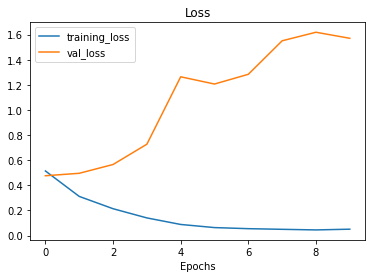

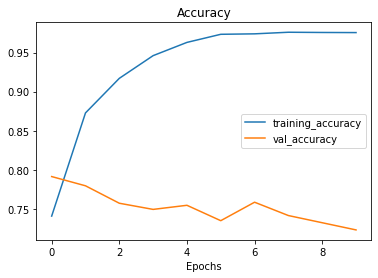

In [65]:
plot_graphs(hist_4)

## Model 5 Pretrained Embedding (Transfer Learning)

We can use pretrained embeddings from Tensorflowhub.
We are going to use Universal Sentence Encoder from Tensorflow hub to learn the embeddings from words.



In [58]:
import numpy as np
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
sample_sentence = np.random.choice(X_train)
embed_samples = embed([sample_sentence])

print(embed_samples[0][:50])

tf.Tensor(
[ 0.04493982  0.07510825  0.06351347 -0.01562481 -0.08386332  0.07840145
  0.0365879  -0.00504787  0.05610066  0.00482853  0.08168934  0.08372366
 -0.03949929 -0.04125081 -0.00064119 -0.03957462 -0.08439755  0.0298594
 -0.0361927  -0.05785606 -0.0804058   0.00219276 -0.06842608  0.04503179
  0.0316854   0.01754772 -0.02408014 -0.0376779   0.00682998 -0.04865956
 -0.07083604  0.08417416  0.02593586  0.0391228   0.02531863  0.06149671
 -0.07492529 -0.00308754 -0.0071991   0.00263474  0.02709704  0.07251261
 -0.00555441 -0.02955686  0.04459886  0.0111223   0.02933203 -0.02590208
  0.0159054  -0.00821143], shape=(50,), dtype=float32)


In [59]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [60]:


model_5 = tf.keras.Sequential([
  sentence_encoder_layer, # encoder layer for embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6")


In [61]:
# Compile model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [62]:
model_5.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [66]:
hist_5 = model_5.fit(X_train,
                     y_train,
                     epochs=10,
                     validation_data=(X_val, y_val))

Epoch 1/10
215/215 [==============================] - 4s 21ms/step - loss: 0.3512 - accuracy: 0.8462 - val_loss: 0.4042 - val_accuracy: 0.8215
Epoch 2/10
215/215 [==============================] - 3s 16ms/step - loss: 0.3437 - accuracy: 0.8521 - val_loss: 0.4018 - val_accuracy: 0.8215
Epoch 3/10
215/215 [==============================] - 2s 11ms/step - loss: 0.3378 - accuracy: 0.8535 - val_loss: 0.4041 - val_accuracy: 0.8241
Epoch 4/10
215/215 [==============================] - 2s 11ms/step - loss: 0.3302 - accuracy: 0.8565 - val_loss: 0.4075 - val_accuracy: 0.8255
Epoch 5/10
215/215 [==============================] - 2s 11ms/step - loss: 0.3236 - accuracy: 0.8618 - val_loss: 0.4046 - val_accuracy: 0.8255
Epoch 6/10
215/215 [==============================] - 2s 11ms/step - loss: 0.3143 - accuracy: 0.8660 - val_loss: 0.4153 - val_accuracy: 0.8241
Epoch 7/10
215/215 [==============================] - 2s 11ms/step - loss: 0.3085 - accuracy: 0.8699 - val_loss: 0.4167 - val_accuracy: 0.8176

In [67]:
# Evaluate Model

y_pred_train = tf.squeeze(tf.round(model_5.predict(X_train)))
y_pred_val = tf.squeeze(tf.round(model_5.predict(X_val)))

evaluate_model(y_train,y_pred_train,y_val,y_pred_val)

Train accuracy:  0.895197781345789
--------------------------------------------------

Validation accuracy:  0.8162729658792651
--------------------------------------------------

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       426
           1       0.83      0.74      0.78       336

    accuracy                           0.82       762
   macro avg       0.82      0.81      0.81       762
weighted avg       0.82      0.82      0.81       762



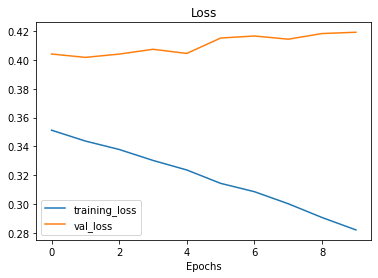

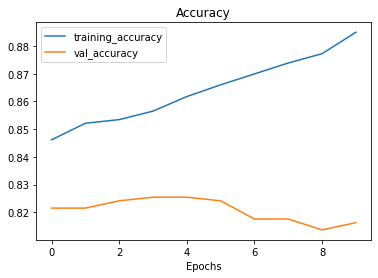

In [68]:
plot_graphs(hist_5)

### Extra Resources:

https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e

https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32

https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks

[MIT Lecture on RNN](https://www.youtube.com/watch?v=SEnXr6v2ifU&feature=youtu.be)
